In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [115]:
# включим для графиков LaTeX и добавим русский
from matplotlib import rc
rc('font',**{'family':'serif'})
rc('text', usetex=True)
rc('text.latex', preamble='\\usepackage[utf8]{inputenc}')
rc('text.latex', preamble='\\usepackage[russian]{babel}')

## Таблицы

In [253]:
# pip install xlrd
# ...

In [37]:
data = pd.read_csv("df_CdS.csv", header=0)
data = data.head()

In [38]:
data.head()

,ϕ,U,λ,I
0,1600.0 ± 10.0,4.0 ± 2.0,459.1 ± 1.3,0.355 ± 0.041
1,1700.0 ± 10.0,7.0 ± 2.0,471.6 ± 1.2,0.409 ± 0.041
2,1800.0 ± 10.0,12.0 ± 2.0,483.5 ± 1.2,0.375 ± 0.033
3,1900.0 ± 10.0,23.0 ± 2.0,495.4 ± 1.2,0.359 ± 0.024
4,1925.0 ± 10.0,34.0 ± 2.0,498.4 ± 1.2,0.423 ± 0.025


In [39]:
data.columns = ["c1", "c2", "c3", "c4"]

In [40]:
data.head()

,c1,c2,c3,c4
0,1600.0 ± 10.0,4.0 ± 2.0,459.1 ± 1.3,0.355 ± 0.041
1,1700.0 ± 10.0,7.0 ± 2.0,471.6 ± 1.2,0.409 ± 0.041
2,1800.0 ± 10.0,12.0 ± 2.0,483.5 ± 1.2,0.375 ± 0.033
3,1900.0 ± 10.0,23.0 ± 2.0,495.4 ± 1.2,0.359 ± 0.024
4,1925.0 ± 10.0,34.0 ± 2.0,498.4 ± 1.2,0.423 ± 0.025


In [41]:
# обращение к столбцу
# data[data.columns[1]
data[["c1","c3"]]

,c1,c3
0,1600.0 ± 10.0,459.1 ± 1.3
1,1700.0 ± 10.0,471.6 ± 1.2
2,1800.0 ± 10.0,483.5 ± 1.2
3,1900.0 ± 10.0,495.4 ± 1.2
4,1925.0 ± 10.0,498.4 ± 1.2


In [42]:
# вписать в преамбулу \usepackage{booktabs}
print(data.to_latex())

\begin{tabular}{lllll}
\toprule
{} &             c1 &          c2 &           c3 &             c4 \\
\midrule
0 &  1600.0 ± 10.0 &   4.0 ± 2.0 &  459.1 ± 1.3 &  0.355 ± 0.041 \\
1 &  1700.0 ± 10.0 &   7.0 ± 2.0 &  471.6 ± 1.2 &  0.409 ± 0.041 \\
2 &  1800.0 ± 10.0 &  12.0 ± 2.0 &  483.5 ± 1.2 &  0.375 ± 0.033 \\
3 &  1900.0 ± 10.0 &  23.0 ± 2.0 &  495.4 ± 1.2 &  0.359 ± 0.024 \\
4 &  1925.0 ± 10.0 &  34.0 ± 2.0 &  498.4 ± 1.2 &  0.423 ± 0.025 \\
\bottomrule
\end{tabular}



C:\Users\ka124\AppData\Local\Temp\ipykernel_10660\2325418431.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(data.to_latex())


In [49]:
cols = data.columns
cols

Index(['c1', 'c2', 'c3', 'c4'], dtype='object')

In [50]:
data_ = data.copy()

# def f(x): return x.split()[0]
f = lambda x: np.float64(x.split()[0])

for col in cols:
    data_[col] = data_[col].map(f)

In [51]:
data_

,c1,c2,c3,c4
0,1600.0,4.0,459.1,0.355
1,1700.0,7.0,471.6,0.409
2,1800.0,12.0,483.5,0.375
3,1900.0,23.0,495.4,0.359
4,1925.0,34.0,498.4,0.423


In [54]:
# фильтрация
data_["c2"] > 10

0    False
1    False
2     True
3     True
4     True
Name: c2, dtype: bool

In [56]:
data_[data_["c2"] > 10]

,c1,c2,c3,c4
2,1800.0,12.0,483.5,0.375
3,1900.0,23.0,495.4,0.359
4,1925.0,34.0,498.4,0.423


In [61]:
# вся таблица -- DataFrame
# один столбец/строка -- Series
[data_["c2"].mean(), data_["c2"].max(), data_["c2"].min()]

[16.0, 34.0, 4.0]

## Графики

In [68]:
x = data_["c2"]
y = data_["c4"]

In [71]:
np.array(x)

array([ 4.,  7., 12., 23., 34.])

In [72]:
np.sqrt(x)

0    2.000000
1    2.645751
2    3.464102
3    4.795832
4    5.830952
Name: c2, dtype: float64

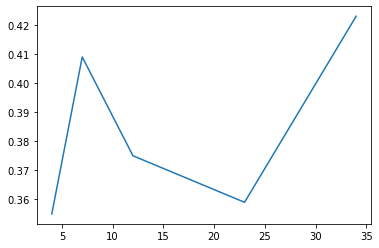

In [78]:
plt.plot(x, y)
plt.savefig("1.pdf")
# если обрезаются края, то
# plt.savefig("1.pdf", bbox_inches='tight', pad_inches=0)
plt.show()

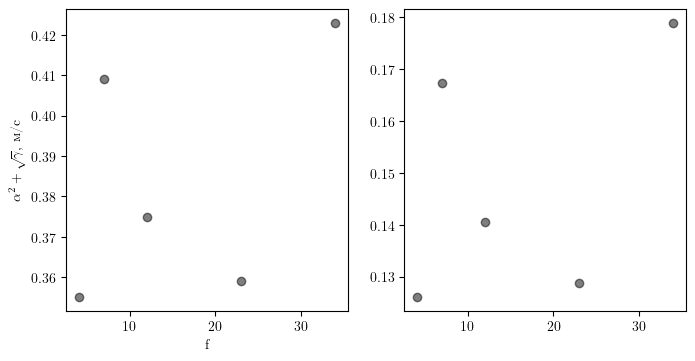

In [124]:
# несколько графиков
# alpha -- прозрачность
fig, axs = plt.subplots(1, 2, dpi=100, figsize=(8, 4))
axs[0].scatter(x, y, color="k", alpha=0.5)
axs[1].scatter(x, y**2, color="k", alpha=0.5)
axs[0].set_xlabel("f")
axs[0].set_ylabel("$\\alpha^2 + \\sqrt{\\gamma}$, м/с")
plt.show()

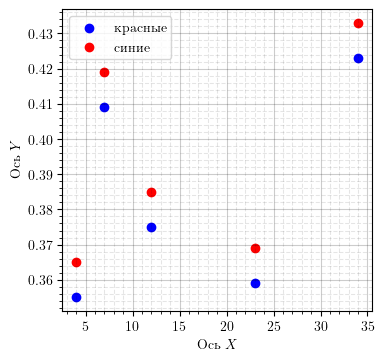

In [134]:
fig, ax = plt.subplots(dpi=100, figsize=(4, 4)) #важно
ax.scatter(x, y, color="b", label="красные")
ax.scatter(x, y+0.01, color="r", label="синие")
ax.minorticks_on()
ax.grid(visible=True, which='major', color='k', linestyle='-', alpha=0.2)
ax.grid(visible=True, which='minor', color='k', linestyle='--', alpha=0.1)
plt.xlabel("Ось $X$")
plt.ylabel("Ось $Y$")
plt.legend()
plt.show()

## Погрешности

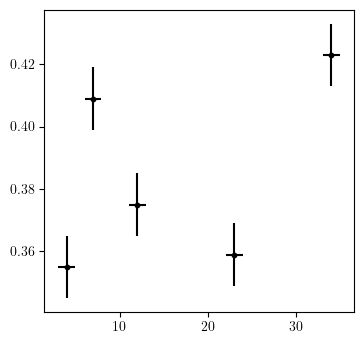

In [155]:
fig, ax = plt.subplots(dpi=100, figsize=(4, 4)) 
ax.errorbar(x, y, fmt=",", yerr=0.01, xerr=data_["c3"]  * 2e-3, color="k")
ax.scatter(x, y, color="k", s=10)
plt.show()

## Фит полиномом

In [159]:
rc('text', usetex=False)

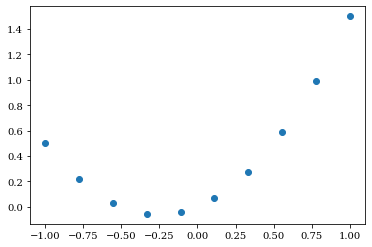

In [184]:
x = np.linspace(-1, 1, 10)
y = x**2 + 0.5 * x
plt.scatter(x, y)
plt.show()

In [185]:
par, cov = np.polyfit(x, y, 3, cov=True)

In [186]:
par

array([2.87853173e-15, 1.00000000e+00, 5.00000000e-01, 1.25508310e-16])

In [187]:
np.diag(cov)**0.5

array([1.04042313e-16, 5.59210627e-17, 8.15716203e-17, 3.03596091e-17])

In [190]:
g = np.poly1d(par)
g(1)

1.500000000000001

In [191]:
x0 = np.linspace(np.min(x), np.max(x), 100)

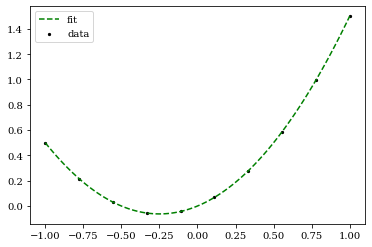

In [197]:
plt.plot(x0, g(x0), "g--", label="fit")
plt.scatter(x, y, label="data", s=5, color="k")
plt.legend()
plt.show()

## фит функции

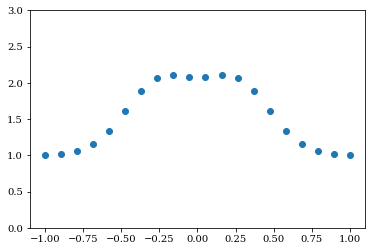

In [240]:
x = np.linspace(-1, 1, 20)
y = np.exp(-(x-1/4)**2 * 10) + 1 + np.exp(-(x+1/4)**2 * 10) 
plt.scatter(x, y)
plt.ylim(0, 3)
plt.show()

In [241]:
from scipy.optimize import curve_fit

In [242]:
def gauss(x, a1, b1, c1, a2, b2, c2, c):
    return a1 * np.exp(-b1 * (x-c1)**2) + a2 * np.exp(-b2 * (x-c2)**2) + c

In [249]:
popt, pcov = curve_fit(gauss, x, y, p0 = [1, 1, -1, 1, 1, 1, 1])

In [250]:
popt

array([ 1.  , 10.  ,  0.25,  1.  , 10.  , -0.25,  1.  ])

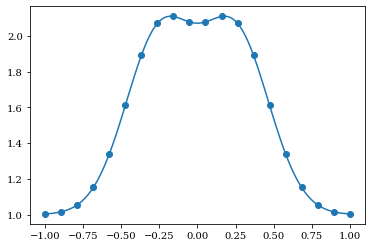

In [251]:
plt.scatter(x, y)
plt.plot(x0, gauss(x0, *popt))
plt.show()